In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('12345.xlsx')

In [3]:
data

,sentences,score
0,عالی بود. ممنون,1
1,فوق العاده. راضی هستم,1
2,بدک نبود. مرسی,0
3,تعریفی نداشت. بد هم نبود,0
4,فوق العاده بود,1
5,صد در صد راضی هستم,1
6,خیلی خوب,1
7,خیلی مناسب با قیمت مناسب,1
8,افتضاح بود. خرید اول و آخرم بود,-1
9,افتضاح بود. خرید اول و آخرم بود,-1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x= data.sentences

In [6]:
y= data.score

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression(multi_class='multinomial')

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
tt = CountVectorizer()

In [12]:
texttrain = tt.fit_transform(xtrain)

In [13]:
texttest = tt.transform(xtest)

In [14]:
model.fit(texttrain, ytrain)

LogisticRegression(multi_class='multinomial')

In [15]:
model.score(texttrain, ytrain)

1.0

In [16]:
import matplotlib.pyplot as plt

In [17]:
yy=model.predict(texttest)

In [18]:
ytest

18    0
6     1
11   -1
27   -1
4     1
31   -1
7     1
9    -1
25   -1
24   -1
16    1
Name: score, dtype: int64

In [19]:
model.score(texttest, ytest)

0.9090909090909091

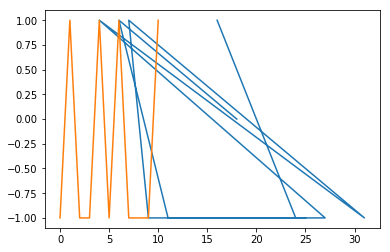

In [20]:
plt.plot(ytest)
plt.plot(yy)

{'whiskers': [<matplotlib.lines.Line2D at 0x22403cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x224030f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22403940>,
 'medians': [<matplotlib.lines.Line2D at 0x1d0fa278>,
 'fliers': [<matplotlib.lines.Line2D at 0x224a1d30>,
 'means': []}

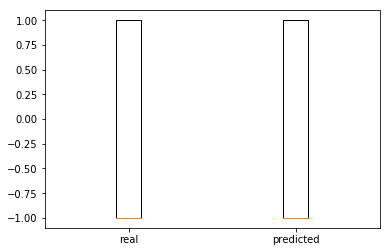

In [33]:
plt.boxplot([ytest, yy] , labels =['real','predicted'])

(array([6., 0., 0., 0., 0., 1., 0., 0., 0., 4.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

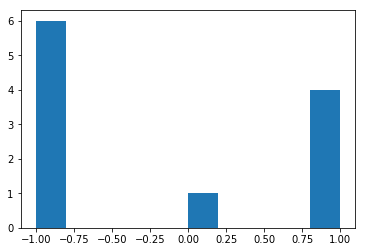

In [36]:
plt.hist(ytest)

(array([7., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

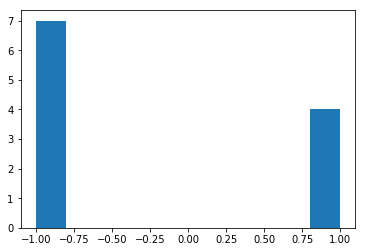

In [37]:
plt.hist(yy)